In [2]:
import pandas as pd
import numpy as np

In [3]:
part_d_df = pd.read_csv('data/part_d_2015.csv', low_memory=False)
exclusion_df = pd.read_csv('data/exclusion_list_2016.csv', low_memory=False)
print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (24524894, 21)


In [4]:
part_d_df.head(2)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1003000522,WEIGAND,FREDERICK,DELTONA,FL,Family Practice,S,GEMFIBROZIL,GEMFIBROZIL,NaN,...,75.0,2250,581.96,NaN,#,NaN,#,NaN,NaN,NaN
1,1003000530,SEMONCHE,AMANDA,QUAKERTOWN,PA,Internal Medicine,S,CLONAZEPAM,CLONAZEPAM,NaN,...,36.0,1079,205.16,NaN,#,NaN,#,NaN,NaN,NaN


In [5]:
exclusion_df.head(2)
len(exclusion_df)

662

In [6]:
# reorganize data columns
part_d_df = part_d_df[['npi', 'nppes_provider_city','nppes_provider_state', 'specialty_description', 'description_flag',\
                        'drug_name', 'generic_name', 'bene_count', 'total_claim_count','total_day_supply', \
                        'total_drug_cost', 'bene_count_ge65', 'total_claim_count_ge65', 'total_day_supply_ge65',\
                        'total_drug_cost_ge65']]

# assigning exclusion (False = 0, True = 1)
exclusion_npi = exclusion_df['NPI'].values.tolist()

part_d_df['is_excluded'] = 0
part_d_df.loc[part_d_df['npi'].isin(exclusion_npi), 'is_excluded'] = 1

# get US data to analyze
states = ['AK', 'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', \
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', \
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', \
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', \
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI',' WY']

part_d_df = part_d_df[part_d_df['nppes_provider_state'].isin(states)]

print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (24101572, 16)


In [7]:
len(exclusion_df['NPI'].unique())

661

In [8]:
len(exclusion_df['SPECIALTY'].unique())

66

In [9]:
len(part_d_df.loc[part_d_df['npi'].isin(exclusion_npi)])

6009

In [10]:
part_d_df.loc[part_d_df['is_excluded']==1].head(2)

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
498805,1023004587,CRESTWOOD,IL,Internal Medicine,S,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE,56.0,121,3024,1150.45,NaN,104.0,2598.0,1016.95,1
498806,1023004587,CRESTWOOD,IL,Internal Medicine,S,ADVAIR DISKUS,FLUTICASONE/SALMETEROL,NaN,30,900,10445.31,NaN,NaN,NaN,NaN,1


In [11]:
# Top 20 states which has the most prescribers
part_d_df_state_count = part_d_df.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_state_count

,npi,nppes_provider_city,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
nppes_provider_state,,,,,,,,,,,,,,,
CA,2340805,2340805,2340805,2340805,2340805,2340805,924913,2340805,2340805,2340805,342625,1383629,1383629,1383629,2340805
NY,1668873,1668873,1668873,1668873,1668873,1668873,613571,1668873,1668873,1668873,226726,990581,990581,990581,1668873
FL,1643021,1643021,1643021,1643021,1643021,1643021,725288,1643021,1643021,1643021,240093,932261,932261,932261,1643021
TX,1500581,1500581,1500581,1500581,1500581,1500581,627212,1500581,1500581,1500581,197875,829572,829572,829572,1500581
PA,1241115,1241115,1241115,1241115,1241115,1241115,451919,1241115,1241115,1241115,163849,741849,741849,741849,1241115
OH,1017468,1017468,1017468,1017468,1017468,1017468,403640,1017468,1017468,1017468,145579,591614,591614,591614,1017468
IL,886988,886988,886988,886988,886988,886988,320552,886988,886988,886988,119183,528839,528839,528839,886988
NC,884260,884260,884260,884260,884260,884260,341284,884260,884260,884260,118345,505418,505418,505418,884260
MI,841699,841699,841699,841699,841699,841699,346279,841699,841699,841699,119489,448822,448822,448822,841699


In [12]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
is_excluded,,,,,,,,,,,,,,,
0,24095563,24095563,24095563,24095563,24095563,24095563,24095563,9286756,24095563,24095563,24095563,3337986,13898619,13898619,13898619
1,6009,6009,6009,6009,6009,6009,6009,2272,6009,6009,6009,928,3424,3424,3424


In [13]:
# export exclusion providers data to do statistics analysis, run once when needed by uncommenting two lines below
part_d_df_exclusion = part_d_df[part_d_df['is_excluded'] == 1]
#part_d_df_exclusion.to_csv('exclusion2017.csv')

In [14]:
len(part_d_df_exclusion['npi'].unique())

150

In [15]:
part_d_df_exclusion[['npi']].to_csv('2015_part_d_e_npi.csv')

In [16]:
len(part_d_df_exclusion['drug_name'].unique())

628

In [17]:
len(part_d_df_exclusion['specialty_description'].unique())

27

In [18]:
part_d_df_exclusion['specialty_description'].unique()

array(['Internal Medicine', 'Family Practice', 'Emergency Medicine',
       'Psychiatry & Neurology', 'Physician Assistant', 'Dentist',
       'Nurse Practitioner', 'General Practice', 'Podiatry',
       'Obstetrics/Gynecology', 'Pain Management', 'General Surgery',
       'Physical Medicine and Rehabilitation', 'Optometry', 'Psychiatry',
       'Dermatology', 'Gastroenterology', 'Pulmonary Disease',
       'Geriatric Medicine', 'Osteopathic Manipulative Medicine',
       'Anesthesiology', 'Specialist', 'Interventional Pain Management',
       'Medical Genetics, Ph.D. Medical Genetics', 'Neurology',
       'Neuropsychiatry', 'Naturopath'], dtype=object)

In [19]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_exclusion_npi_count = part_d_df_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_exclusion_npi_count.reset_index(level=["npi"], inplace=True)
part_d_df_exclusion_npi_count

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,1588694343,250,250,250,250,250,250,105,250,250,250,58,195,195,195,250
1,1578524237,218,218,218,218,218,218,94,218,218,218,34,143,143,143,218
2,1245246925,211,211,211,211,211,211,81,211,211,211,52,143,143,143,211
3,1083681423,203,203,203,203,203,203,73,203,203,203,31,136,136,136,203
4,1578754362,199,199,199,199,199,199,76,199,199,199,16,133,133,133,199
5,1093851164,198,198,198,198,198,198,71,198,198,198,18,123,123,123,198
6,1871571406,195,195,195,195,195,195,134,195,195,195,48,127,127,127,195
7,1598713430,192,192,192,192,192,192,117,192,192,192,52,92,92,92,192
8,1659703734,173,173,173,173,173,173,84,173,173,173,40,97,97,97,173
9,1891703997,162,162,162,162,162,162,53,162,162,162,10,97,97,97,162


In [20]:
# Top 20 states which has the most excluded prescribers
part_d_df_exclusion_state_count = part_d_df_exclusion.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_exclusion_state_count.reset_index(level=["nppes_provider_state"], inplace=True)
part_d_df_exclusion_state_count

,nppes_provider_state,npi,nppes_provider_city,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,IL,980,980,980,980,980,980,378,980,980,980,174,603,603,603,980
1,CA,663,663,663,663,663,663,229,663,663,663,85,414,414,414,663
2,MI,501,501,501,501,501,501,240,501,501,501,96,235,235,235,501
3,TX,460,460,460,460,460,460,169,460,460,460,101,259,259,259,460
4,FL,400,400,400,400,400,400,145,400,400,400,45,228,228,228,400
5,NY,378,378,378,378,378,378,135,378,378,378,40,224,224,224,378
6,AL,375,375,375,375,375,375,114,375,375,375,56,173,173,173,375
7,NJ,360,360,360,360,360,360,131,360,360,360,26,170,170,170,360
8,NM,284,284,284,284,284,284,157,284,284,284,53,162,162,162,284
9,KY,242,242,242,242,242,242,107,242,242,242,44,155,155,155,242


In [21]:
# Top 20 specialties which has the most excluded prescribers
part_d_df_exclusion_specialty_count = part_d_df_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_exclusion_specialty_count

,specialty_description,npi,nppes_provider_city,nppes_provider_state,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,Internal Medicine,2553,2553,2553,2553,2553,2553,1013,2553,2553,2553,316,1469,1469,1469,2553
1,Family Practice,1674,1674,1674,1674,1674,1674,571,1674,1674,1674,242,990,990,990,1674
2,Nurse Practitioner,283,283,283,283,283,283,123,283,283,283,66,149,149,149,283
3,Physical Medicine and Rehabilitation,222,222,222,222,222,222,126,222,222,222,61,107,107,107,222
4,Geriatric Medicine,218,218,218,218,218,218,80,218,218,218,17,139,139,139,218
5,General Practice,153,153,153,153,153,153,31,153,153,153,8,80,80,80,153
6,Psychiatry & Neurology,151,151,151,151,151,151,61,151,151,151,54,101,101,101,151
7,Psychiatry,131,131,131,131,131,131,33,131,131,131,42,90,90,90,131
8,General Surgery,84,84,84,84,84,84,26,84,84,84,4,36,36,36,84
9,Physician Assistant,72,72,72,72,72,72,18,72,72,72,9,34,34,34,72


After full US dataset analysis, will use NJ data to do detailed analysis

In [22]:
part_d_df_small=part_d_df[part_d_df['nppes_provider_state']=='NJ']

In [23]:
len(part_d_df_small)

656338

In [24]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df_small.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
is_excluded,,,,,,,,,,,,,,,
0,655978,655978,655978,655978,655978,655978,655978,245313,655978,655978,655978,92906,393154,393154,393154
1,360,360,360,360,360,360,360,131,360,360,360,26,170,170,170


In [25]:
# Top specialties which has the most excluded prescribers in small dataset
part_d_df_small_exclusion = part_d_df_small[part_d_df_small['is_excluded'] == 1]
part_d_df_small_exclusion_specialty_count = part_d_df_small_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_small_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_small_exclusion_specialty_count

,specialty_description,npi,nppes_provider_city,nppes_provider_state,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,Internal Medicine,261,261,261,261,261,261,100,261,261,261,21,125,125,125,261
1,General Surgery,83,83,83,83,83,83,25,83,83,83,4,36,36,36,83
2,Family Practice,15,15,15,15,15,15,6,15,15,15,1,8,8,8,15
3,Dentist,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1


In [26]:
# add a new field called drug_count to the dataframe
part_d_df_small["drug_count"] = 1

# use the groupby() and agg() methods to create a new dataframe. use numpy sum method to populate values
prescriber_specialty_df = part_d_df_small.groupby(["npi","specialty_description"]).agg({"total_claim_count": np.sum,  "drug_count": np.sum})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
prescriber_specialty_df.head()

,,total_claim_count,drug_count
npi,specialty_description,,
1003002072,Urology,1526,20
1003002858,Nurse Practitioner,1927,41
1003011891,Gastroenterology,454,19
1003012410,Family Practice,764,39
1003019910,Dentist,283,5


In [28]:
# to merge the tables we need to flatten the indices.
prescriber_specialty_df.reset_index(level=["npi","specialty_description"], inplace=True)

In [29]:
prescriber_specialty_df.head()

,npi,specialty_description,total_claim_count,drug_count
0,1003002072,Urology,1526,20
1,1003002858,Nurse Practitioner,1927,41
2,1003011891,Gastroenterology,454,19
3,1003012410,Family Practice,764,39
4,1003019910,Dentist,283,5


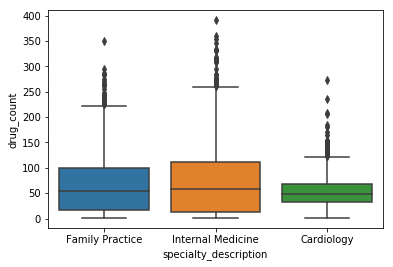

In [30]:
# show that different medical specialties prescribe different numbers of drugs
import seaborn as sb
%matplotlib inline

sb.boxplot(x="specialty_description", y="drug_count", 
           data=prescriber_specialty_df
           [
           (prescriber_specialty_df["specialty_description"] == "Internal Medicine") |
           (prescriber_specialty_df["specialty_description"] == "Family Practice") |
           (prescriber_specialty_df["specialty_description"] == "Cardiology")
           ]
          )

In [31]:
# User pandas crosstab function to create a dataframe where each row is a prescriber identified by their NPI, 
# the columns are the drug generic names, the values are the sum of total_claim_count
npi_generic_cross_df = pd.crosstab(part_d_df_small["npi"], part_d_df_small["generic_name"], values=part_d_df_small["total_claim_count"], 
                                  aggfunc=np.sum)

In [32]:
# To replace the NaN (not a number) from the cells with zero the fillna() method is used.
npi_generic_cross_df = npi_generic_cross_df.fillna(0)

In [33]:
npi_generic_cross_df.head()

generic_name,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,ABATACEPT/MALTOSE,ABIRATERONE ACETATE,ACAMPROSATE CALCIUM,ACARBOSE,...,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZIPRASIDONE MESYLATE,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL&WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
npi,,,,,,,,,,,,,,,,,,,,,
1003002072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003002858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003011891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003012410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003019910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# use npi to merge two tables prescriber_specialty_df and npi_generic_cross_df
prescriber_specialty_generic_df = pd.merge(prescriber_specialty_df, npi_generic_cross_df.reset_index(level=["npi"]), on="npi")

In [35]:
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZIPRASIDONE MESYLATE,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL&WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
0,1003002072,Urology,1526,20,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003002858,Nurse Practitioner,1927,41,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003011891,Gastroenterology,454,19,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003012410,Family Practice,764,39,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003019910,Dentist,283,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
prescriber_specialty_generic_df = prescriber_specialty_generic_df.sort_values(by=["specialty_description", "npi"])

In [37]:
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZIPRASIDONE MESYLATE,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL&WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
1609,1063624823,Addiction Medicine,13,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15222,1639295470,Addiction Medicine,114,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19354,1801833520,Addiction Medicine,14,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,1003878943,Allergy/Immunology,85,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
432,1013919141,Allergy/Immunology,27,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Since the data has been resorted by specialty_desc and npi, index needs to be updated to reflect new order of data
prescriber_specialty_generic_df=prescriber_specialty_generic_df.reset_index(drop=True)
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZIPRASIDONE MESYLATE,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL&WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
0,1063624823,Addiction Medicine,13,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1639295470,Addiction Medicine,114,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1801833520,Addiction Medicine,14,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003878943,Allergy/Immunology,85,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1013919141,Allergy/Immunology,27,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_small_exclusion_npi_count = part_d_df_small_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_small_exclusion_npi_count

,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
npi,,,,,,,,,,,,,,,
1609829985,99,99,99,99,99,99,42,99,99,99,10,46,46,46,99
1043257744,88,88,88,88,88,88,38,88,88,88,7,36,36,36,88
1912069394,83,83,83,83,83,83,25,83,83,83,4,36,36,36,83
1922032770,49,49,49,49,49,49,15,49,49,49,2,30,30,30,49
1548278930,25,25,25,25,25,25,5,25,25,25,2,13,13,13,25
1831151356,15,15,15,15,15,15,6,15,15,15,1,8,8,8,15
1134106511,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1


In [66]:
# Based on analyzed result, the interested excluded npi is 1609829985
# we need to find out the position of 1609829985 based on this script, the result is 11787
# update the position of the rest of the scripts using 11787
prescriber_specialty_generic_df.loc[prescriber_specialty_generic_df['npi'] == 1609829985]

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZIPRASIDONE MESYLATE,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL&WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
11787,1609829985,Internal Medicine,3265,99,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0


In [41]:
#part_d_df_small_exclusion[part_d_df_small_exclusion['specialty_description'] == 'Family Practice']

In [67]:
part_d_df_exclusion.loc[part_d_df_exclusion['npi'] == 1609829985].head()

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
14842496,1609829985,SEA GIRT,NJ,Internal Medicine,S,PREDNISONE,PREDNISONE,16.0,33,2025,276.13,NaN,NaN,NaN,NaN,1
14842554,1609829985,SEA GIRT,NJ,Internal Medicine,S,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE,NaN,12,159,148.54,NaN,NaN,NaN,NaN,1
14842555,1609829985,SEA GIRT,NJ,Internal Medicine,S,ADVAIR DISKUS,FLUTICASONE/SALMETEROL,11.0,26,1380,14432.10,11.0,26.0,1380.0,14432.10,1
14842556,1609829985,SEA GIRT,NJ,Internal Medicine,S,ALENDRONATE SODIUM,ALENDRONATE SODIUM,NaN,14,1094,207.08,NaN,14.0,1094.0,207.08,1
14842557,1609829985,SEA GIRT,NJ,Internal Medicine,S,ALLOPURINOL,ALLOPURINOL,NaN,16,1020,228.10,NaN,16.0,1020.0,228.10,1


Shift from using the Pandas dataframe object to the `numpy.array`. Slice off the columns that are not related to the number of filled prescriptions and convert this to a matrix. The `iloc()` method slices a dataframe by the column and the method `as_matrix()` converts the dataframe into a numpy array.

In [68]:
pf_matrix = prescriber_specialty_generic_df.iloc[: , 4: ].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [69]:
pf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
identifiers_matrix = prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [71]:
generic_array = prescriber_specialty_generic_df.columns[4:]

In [72]:
generic_array

Index(['0.9 % SODIUM CHLORIDE', 'ABACAVIR SULFATE',
       'ABACAVIR SULFATE/LAMIVUDINE', 'ABACAVIR/DOLUTEGRAVIR/LAMIVUDI',
       'ABACAVIR/LAMIVUDINE/ZIDOVUDINE', 'ABATACEPT', 'ABATACEPT/MALTOSE',
       'ABIRATERONE ACETATE', 'ACAMPROSATE CALCIUM', 'ACARBOSE',
       ...
       'ZIDOVUDINE', 'ZILEUTON', 'ZIPRASIDONE HCL', 'ZIPRASIDONE MESYLATE',
       'ZOLEDRONIC ACID', 'ZOLEDRONIC ACID/MANNITOL&WATER', 'ZOLMITRIPTAN',
       'ZOLPIDEM TARTRATE', 'ZONISAMIDE', 'ZOSTER VACCINE LIVE/PF'],
      dtype='object', length=1187)

In [73]:
# to compute the distance between a vector representing the drugs that a prescriber prescribes 
# we need to import the scipy.spatial library.
import scipy.spatial

Normalize the claim count of prescriptions by the total number of claims for the prescriber. Each entry now represent the percentage of total claims that are associated with the prescriber.

In [74]:
np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

array([[ 13.],
       [114.],
       [ 14.],
       ...,
       [ 42.],
       [186.],
       [280.]])

In [75]:
normalized_pf_matrix = pf_matrix / np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

In [76]:
normalized_pf_matrix.shape

(24089, 1187)

Use the euclidean distance to compute the distance between two prescribers. The results of the pdist() function need to be placed into square form. 

In [77]:
prescriber_dist = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(normalized_pf_matrix, "euclidean"))

In [78]:
prescriber_dist.shape

(24089, 24089)

As we have sorted the prescribers by their specialty then we expect to see some spatial patterns in the distance matrix. A matrix can be visualized using the `matplotlib` library.

In [79]:
import matplotlib.pyplot as plt

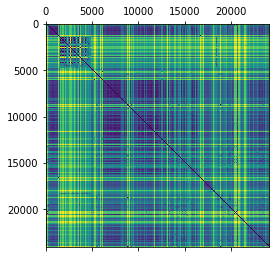

In [80]:
plt.matshow(prescriber_dist)

In [81]:
prescriber_specialty_generic_df.iloc[11787,0:4]

npi                             1609829985
specialty_description    Internal Medicine
total_claim_count                     3265
drug_count                              99
Name: 11787, dtype: object

In [82]:
providers_sorted = np.lexsort((prescriber_dist[:,11787].tolist(),))

In [83]:
# The prescriber referenced at position 17368 is an Internal Medicine. 
# We can now calculate the prescribers most similar to this Internal Medicine.
prescriber_dist[11787,:]
np.sort(prescriber_dist[11787])[providers_sorted[0:16]]

array([0.41385121, 0.42417516, 0.24745242, 0.43676663, 0.40163558,
       0.36387148, 0.28189882, 0.25119686, 0.42208231, 0.29379272,
       0.41396223, 0.42214563, 0.36665044, 0.25784668, 0.37588396,
       0.29773687])

In [84]:
# plotting the distances we can see that prescribers most like are probably also Internal Medicine.
#plt.scatter(np.arange(prescriber_dist.shape[0]),prescriber_dist[7745,:])

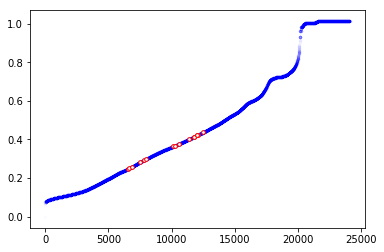

In [85]:
dis_range = np.arange(prescriber_dist.shape[0])
#plt.scatter(np.arange(prescriber_dist.shape[0]),np.sort(prescriber_dist[7745,:]))
plt.scatter(dis_range,np.sort(prescriber_dist[11787,:]), color='blue', alpha=0.01, s=7)
plt.scatter(dis_range[providers_sorted[0:16]],np.sort(prescriber_dist[11787])[providers_sorted[0:16]], color='white', alpha=1, s=14, edgecolor='red')

In [86]:
#providers_sorted = np.lexsort((prescriber_dist[:,7745].tolist(),))

In [87]:
prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()[providers_sorted[0:16],:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1609829985, 'Internal Medicine'],
       [1689612129, 'Internal Medicine'],
       [1104938802, 'Family Practice'],
       [1790762706, 'Internal Medicine'],
       [1487698197, 'Internal Medicine'],
       [1114950565, 'Internal Medicine'],
       [1689661951, 'Family Practice'],
       [1174736193, 'Family Practice'],
       [1669449476, 'Internal Medicine'],
       [1871582304, 'Family Practice'],
       [1609849249, 'Internal Medicine'],
       [1669522595, 'Internal Medicine'],
       [1144368358, 'Internal Medicine'],
       [1295820322, 'Family Practice'],
       [1245205145, 'Internal Medicine'],
       [1942346432, 'Family Practice']], dtype=object)

In [88]:
np.lexsort(((-1 * pf_matrix[11787,:]).tolist(),))[0:16]

array([ 634,   89,  474,   58,   66,   45,  648,  689, 1014,  181,  989,
        824, 1184,  717,  861,  925], dtype=int64)

In [89]:
generic_array[np.lexsort(((-1 * pf_matrix[11787,:]).tolist(),))][0:16]

Index(['LEVOTHYROXINE SODIUM', 'ATORVASTATIN CALCIUM',
       'FLUTICASONE PROPIONATE', 'AMLODIPINE BESYLATE',
       'AMOXICILLIN/POTASSIUM CLAV', 'ALPRAZOLAM', 'LISINOPRIL',
       'METFORMIN HCL', 'SIMVASTATIN', 'CARVEDILOL', 'ROSUVASTATIN CALCIUM',
       'OMEPRAZOLE', 'ZOLPIDEM TARTRATE', 'METOPROLOL TARTRATE',
       'PAROXETINE HCL', 'PRAVASTATIN SODIUM'],
      dtype='object')

In [90]:
part_d_df_small[part_d_df_small["npi"]==1609829985].sort_values("total_claim_count", ascending=False)

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded,drug_count
14842604,1609829985,SEA GIRT,NJ,Internal Medicine,S,LEVOTHYROXINE SODIUM,LEVOTHYROXINE SODIUM,69.0,193,12406,4709.16,NaN,177.0,11589.0,4356.39,1,1
14842563,1609829985,SEA GIRT,NJ,Internal Medicine,S,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,80.0,164,12518,3246.82,NaN,149.0,11874.0,3065.31,1,1
14842589,1609829985,SEA GIRT,NJ,Internal Medicine,S,FLUTICASONE PROPIONATE,FLUTICASONE PROPIONATE,104.0,133,4400,1268.60,93.0,115.0,3870.0,1104.02,1,1
14842559,1609829985,SEA GIRT,NJ,Internal Medicine,S,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,43.0,96,7426,1037.44,NaN,NaN,NaN,NaN,1,1
14842561,1609829985,SEA GIRT,NJ,Internal Medicine,S,AMOXICILLIN-CLAVULANATE POTASS,AMOXICILLIN/POTASSIUM CLAV,81.0,94,934,1118.48,NaN,NaN,NaN,NaN,1,1
14842558,1609829985,SEA GIRT,NJ,Internal Medicine,S,ALPRAZOLAM,ALPRAZOLAM,38.0,88,2820,658.02,NaN,69.0,2290.0,478.40,1,1
14842605,1609829985,SEA GIRT,NJ,Internal Medicine,S,LISINOPRIL,LISINOPRIL,38.0,87,6690,839.67,NaN,NaN,NaN,NaN,1,1
14842610,1609829985,SEA GIRT,NJ,Internal Medicine,S,METFORMIN HCL,METFORMIN HCL,40.0,85,5760,795.04,NaN,NaN,NaN,NaN,1,1
14842634,1609829985,SEA GIRT,NJ,Internal Medicine,S,SIMVASTATIN,SIMVASTATIN,37.0,79,5550,845.50,NaN,NaN,NaN,NaN,1,1
14842569,1609829985,SEA GIRT,NJ,Internal Medicine,S,CARVEDILOL,CARVEDILOL,29.0,75,4542,1126.63,NaN,NaN,NaN,NaN,1,1
